<a href="https://colab.research.google.com/github/niteshydv01/Gold-price-prediction/blob/main/Gold_Price_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
#loading the datafile
df=pd.read_csv('/content/FINAL_USO.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [ ]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
1713,2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,...,20.650000,21.090000,21.090000,60507000,9.49,9.52,9.28,9.29,9.29,21598200
1714,2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,...,20.530001,20.620001,20.620001,76365200,9.25,9.92,9.23,9.90,9.90,40978800
1715,2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,...,20.700001,20.969999,20.969999,52393000,9.59,9.65,9.37,9.62,9.62,36578700
1716,2018-12-28,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,...,20.570000,20.600000,20.600000,49835000,9.54,9.65,9.38,9.53,9.53,22803400
1717,2018-12-31,120.980003,121.260002,120.830002,121.250000,121.250000,8449400,249.559998,250.190002,247.470001,...,20.559999,21.090000,21.090000,53866600,9.63,9.71,9.44,9.66,9.66,28417400


In [ ]:
df.shape

(1718, 81)

In [ ]:
df.info()#getting info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [ ]:
df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

In [ ]:
#getting statsical info of data
df.describe()


,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


In [ ]:
correlation=df.corr()

<ipython-input-14-0c9b4bd1cb53>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


<Axes: >

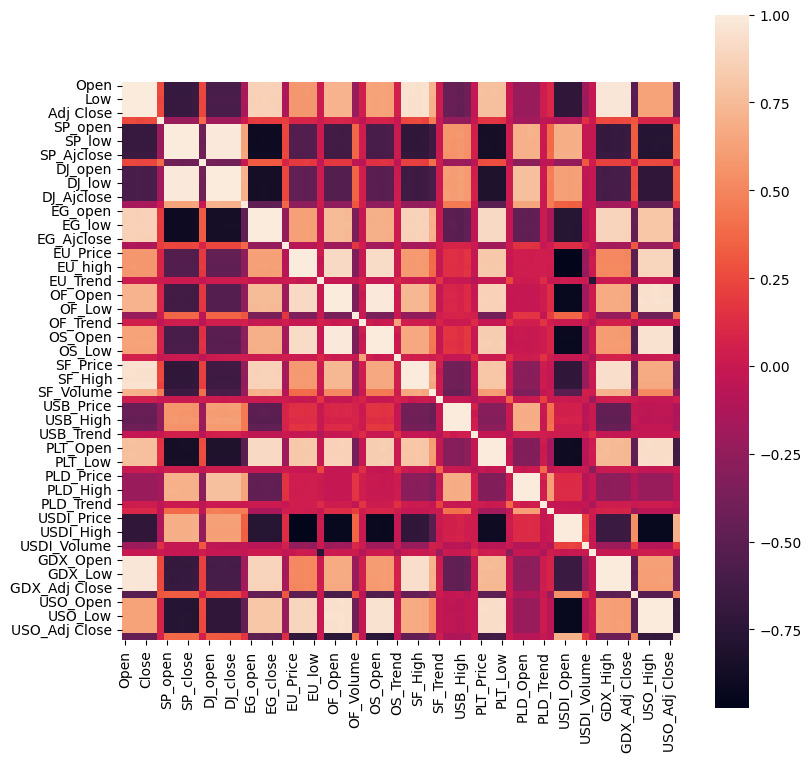

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f')

In [ ]:
#correlation with closing value of gold
print(correlation['Adj Close'])

Open             0.998976
High             0.999535
Low              0.999532
Close            1.000000
Adj Close        1.000000
                   ...   
USO_High         0.635311
USO_Low          0.634732
USO_Close        0.635675
USO_Adj Close    0.635675
USO_Volume      -0.456193
Name: Adj Close, Length: 80, dtype: float64


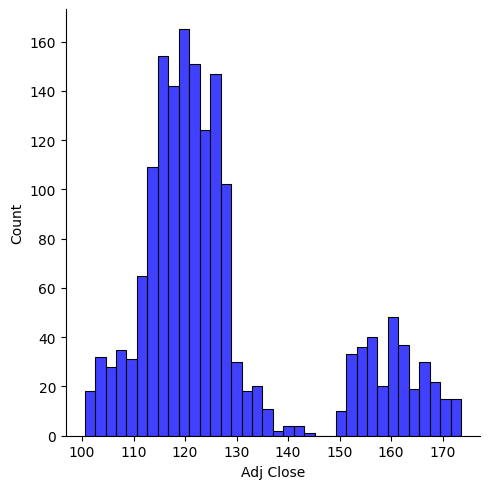

In [ ]:
sns.displot(df['Adj Close'],color='blue')

In [ ]:
x=df.drop(['Date','Adj Close'],axis=1)
y=df['Adj Close']
x

,Open,High,Low,Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,154.740005,154.949997,151.710007,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,154.309998,155.369995,153.899994,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,155.479996,155.860001,154.360001,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,156.820007,157.429993,156.580002,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,156.979996,157.529999,156.130005,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,107.838242,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,119.570000,120.139999,119.570000,120.019997,9736400,239.039993,240.839996,234.270004,234.339996,234.339996,...,20.650000,21.090000,21.090000,60507000,9.490000,9.520000,9.280000,9.290000,9.290000,21598200
1714,120.620003,121.000000,119.570000,119.660004,14293500,235.970001,246.179993,233.759995,246.179993,246.179993,...,20.530001,20.620001,20.620001,76365200,9.250000,9.920000,9.230000,9.900000,9.900000,40978800
1715,120.570000,120.900002,120.139999,120.570000,11874400,242.570007,248.289993,238.960007,248.070007,248.070007,...,20.700001,20.969999,20.969999,52393000,9.590000,9.650000,9.370000,9.620000,9.620000,36578700
1716,120.800003,121.080002,120.720001,121.059998,6864700,249.580002,251.399994,246.449997,247.750000,247.750000,...,20.570000,20.600000,20.600000,49835000,9.540000,9.650000,9.380000,9.530000,9.530000,22803400


In [ ]:
print(y)

0       152.330002
1       155.229996
2       154.869995
3       156.979996
4       157.160004
           ...    
1713    120.019997
1714    119.660004
1715    120.570000
1716    121.059998
1717    121.250000
Name: Adj Close, Length: 1718, dtype: float64


spliting data for training and test

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

Model Training:Random Forest Regressor

In [ ]:
regressor=RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

Model Evalutaion

In [ ]:
#prediction on test data
test_data_prediction=regressor.predict(x_test)

In [ ]:
print(test_data_prediction)

[113.23550114 121.33160046 119.63920191 113.56980051 103.77029991
 114.74479858 126.18110163 124.21439883 128.4820992  120.04700083
 127.68949842 115.78899988 118.95119973 117.9738005  170.39749936
 118.48669946 114.73899906 115.79919983 124.53389882 120.95119932
 161.95160169 119.61060123 153.55100147 118.34200037 128.07270189
 157.47729933 156.45010146 127.15529883 118.16090094 119.65640125
 124.36139936 121.25919915 102.93909771 117.91370096 118.93040029
 120.54669977 155.88530046 120.83190085 117.27470079 163.33190009
 118.21780142 125.38000073 124.51139903 115.35749875 119.73039966
 122.85010019 161.37660089 120.01770023 114.07930011 136.15349761
 112.5914002  122.13590052 126.72620015 123.84680152 122.65379845
 154.20790116 110.8357992  127.08989983 121.31939967 125.56040027
 160.51389969 160.56089639 127.46360023 101.39389979 114.44369974
 161.59649867 157.67629789 113.04250038 120.64100073 123.66600081
 113.05629993 105.9929009  126.13940036 101.94119949 112.02780083
 159.37399

In [ ]:
#R squarred error
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squarred error",error_score)

R squarred error 0.9999190847626849


Compairing the actual values and predicted values


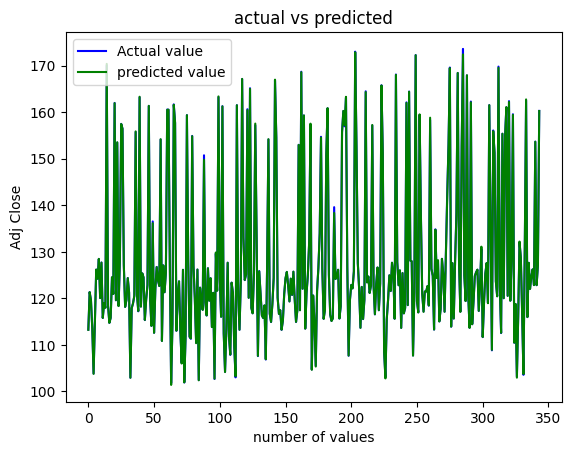

In [ ]:
y_test=list(y_test)
plt.plot(y_test,color='blue',label='Actual value')
plt.plot(test_data_prediction,color='green',label='predicted value')
plt.title('actual vs predicted')
plt.xlabel('number of values')
plt.ylabel('Adj Close')
plt.legend()